<!-- Global site tag (gtag.js) - Google Analytics -->

<script async src="https://www.googletagmanager.com/gtag/js?id=G-ZLMLLKHZE0"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'G-ZLMLLKHZE0');
</script>

Some useful libraries...


In [1]:
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

Import the MNIST dataset we already go to know in the last exercise:


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Veri kümesini normalize et
train_images, test_images = train_images / 255.0, test_images / 255.0

# Exercise: Machine Learning Optimizers

Gradient descent is one of the most popular algorithms to perform optimization and is also one of the most common ways to optimize neural networks. Nevertheless there exist even more refined variants, which we will investigate in this exercise. Six common optimizers are:

* **SGD** Stochastic gradient descent optimizes the parameters of the network by randomly choosing a mini-batch from the entire dataset and calculating the gradient of the loss function $J(\theta)$ with respect to these data points. The learning rate $\eta$ specifies how large of a step we take in the direction of the gradient.

    $\theta \leftarrow \theta - \eta \nabla_{\theta} J(\theta).$
    

* **Momentum** The momentum optimizer refines the optimization by incorporating previous gradients and adding them to a momentum vector $\mathbf{m}$. In order to prevent the momentum from growing infinitely, one adds a friction parameter $\beta$ which has to be chosen appropriately.

    $\mathbf{m}\leftarrow \beta \mathbf{m} + \eta \nabla_{\theta} J(\theta)$,

    $\theta \leftarrow \theta - \mathbf{m}$.


* **NAG** A small modification to momentum optimization is Nesterov accelerated gradient (NAG), which evaluates the gradient not at the current set of parameters $\theta$, but slightly ahead, pointing more in the direction of the optimum.

    $\mathbf{m}\leftarrow \beta \mathbf{m} + \eta \nabla_{\theta} J(\theta + \beta \mathbf{m})$,

    $\theta \leftarrow \theta - \mathbf{m}$.
    

* **AdaGrad** The AdaGrad algorithm focuses the gradient more towards to the optimum by scaling the weight vector along the steepest dimensions. The first step is to accumulate the square of the gradients and then to use this to scale the gradient vector. In order to prevent division by zero we add a small parameter $\epsilon$.

    $\mathbf{s}\leftarrow \mathbf{s} + \nabla_{\theta} J(\theta) \otimes \nabla_{\theta} J(\theta)$,

    $\theta \leftarrow \theta -  \eta \nabla_{\theta} J(\theta) \oslash\sqrt{\mathbf{s} + \epsilon}$.


* **RMSprop** RMSProp is a slight modification of AdaGrad to prevent the training from slowing down too fast. This is done by accumulating only the gradients from the most recent iterations.

    $\mathbf{s}\leftarrow \beta \mathbf{s} + \left(1-\beta\right)\nabla_{\theta} J(\theta) \otimes \nabla_{\theta} J(\theta)$,

    $\theta \leftarrow \theta -  \eta \nabla_{\theta} J(\theta) \oslash \sqrt{\mathbf{s} + \epsilon}$.

* **Adam** The adaptive moment estimation (Adam) combines the ideas of momentum and RMSProp optimization and is one of the most common choices today. $T$ represents the epoch iteration number.

    $\mathbf{m}\leftarrow \beta_1 \mathbf{m} + \left(1-\beta_1\right) \nabla_{\theta} J(\theta)$,

    $\mathbf{s}\leftarrow \beta_2 \mathbf{s} + \left(1-\beta_2\right)\nabla_{\theta} J(\theta) \otimes \nabla_{\theta} J(\theta)$,

    $\mathbf{m} \leftarrow \frac{\mathbf{m}}{1-\beta_1^T}$,

    $\mathbf{s} \leftarrow \frac{\mathbf{s}}{1-\beta_2^T}$,

    $\theta \leftarrow \theta -  \eta \mathbf{m}\oslash \sqrt{\mathbf{s} + \epsilon}$.


In order to use the optimizers already implemented in the keras framework of tensorflow, we use a function which generates and compiles a model for a given optimizer.


In [3]:
def build_compile(optimizer_name='SGD'):
    # Use the same network topology as last week
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])


  # compile the model with a cross-entropy loss and specify the given optimizer
    if optimizer_name == 'SGD':
        optimizer = keras.optimizers.SGD(learning_rate=0.01)
    elif optimizer_name == 'Adam':
        optimizer = keras.optimizers.Adam(learning_rate=0.001)
    elif optimizer_name == 'RMSprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
    else:
        raise ValueError("Invalid optimizer name. Supported optimizers: SGD, Adam, RMSprop")
        
    model.compile(optimizer=optimizer, 
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model


  

In [4]:
model = build_compile(optimizer_name='Adam')

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5066 - accuracy: 0.8220
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3781 - accuracy: 0.8622
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3415 - accuracy: 0.8757
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3174 - accuracy: 0.8828
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2995 - accuracy: 0.8898
313/313 - 0s - loss: 0.3614 - accuracy: 0.8685 - 413ms/epoch - 1ms/step

Test accuracy: 0.8684999942779541


Now we generate an array of the different optimizers to iterate over in a for loop


In [5]:
# Define the array of different optimizers
optimizer_names = ['SGD', 'Momentum', 'Nesterov', 'RMSprop', 'Adagrad', 'Adam', 'NAdam']
optimizer_list = [
    'SGD',
    keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=False),
    keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=True),
    'RMSprop',
    'Adagrad',
    'Adam',
    'NAdam'
]

# Two arrays for training and validation performance
hist_acc = []
hist_val_acc = []

In [7]:
# Assuming you have already loaded and preprocessed your data
# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the dataset
x_train, x_test = train_images / 255.0, test_images / 255.0

# Build a simple model (you may have already defined your own model)
def build_compile(optimizer_name='SGD'):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer_name, 
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    
    return model

# Iterate over optimizers and train the network
for item, name in zip(optimizer_list, optimizer_names):
    print("-----------------------------")
    print("Trying %s optimizer" % str(name))
    print("item:", item)
    print("-----------------------------")

    # Get the model from our function above
    try:
        model = build_compile(item)
    except ValueError as e:
        print("Error:", e)
        continue

    # Train the model
    history = model.fit(x_train, train_labels, epochs=50, batch_size=32, validation_data=(x_test, test_labels))

    # Store the performance
    hist_acc.append(history.history['accuracy'])
    hist_val_acc.append(history.history['val_accuracy'])
    print("-----------------------------")


-----------------------------
Trying SGD optimizer
item: SGD
-----------------------------
Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7516 - accuracy: 0.7562 - val_loss: 0.5691 - val_accuracy: 0.8062
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5142 - accuracy: 0.8236 - val_loss: 0.5070 - val_accuracy: 0.8244
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4691 - accuracy: 0.8377 - val_loss: 0.4798 - val_accuracy: 0.8330
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4424 - accuracy: 0.8474 - val_loss: 0.4651 - val_accuracy: 0.8396
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4252 - accuracy: 0.8531 - val_loss: 0.4591 - val_accuracy: 0.8332
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4106 - accuracy: 0.8577 - val_loss: 0.4433 - val_accuracy: 0.8434
Epoch 7/50
1875/1875 [=======================

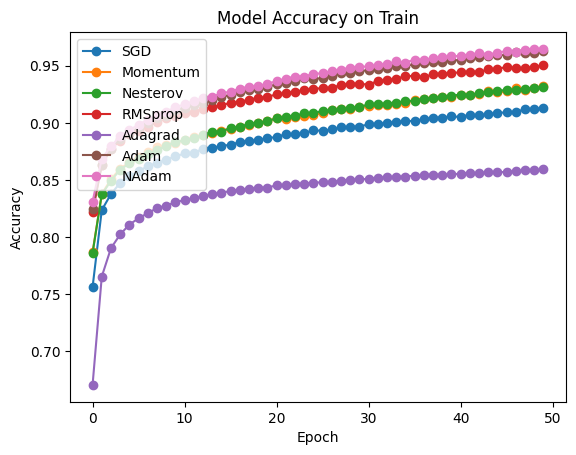

In [8]:
# Summarize history for accuracy on the training set
if not hist_acc:
    print("No training history available.")
else:
    for i in range(len(optimizer_list)):
        if i < len(hist_acc):  # Check if the index is within the bounds of hist_acc
            plt.plot(hist_acc[i], '-o', label=str(optimizer_names[i]))

    plt.title('Model Accuracy on Train')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()


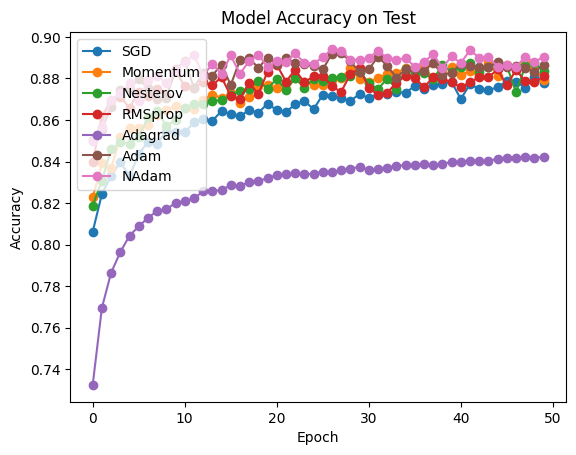

In [9]:
# Summarize history for accuracy on the test set
if not hist_val_acc:
    print("No validation history available.")
else:
    for i in range(len(optimizer_list)):
        if i < len(hist_val_acc):  # Check if the index is within the bounds of hist_val_acc
            plt.plot(hist_val_acc[i], '-o', label=str(optimizer_names[i]))

    plt.title('Model Accuracy on Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()


As already discussed in class, the Adam optimizer shows the best performance as it combines a momentum gradient approach with an adaptive learning rate. NAdam is further improvement, using the Nesterov update instead of vanilla momentum optimization.

# Exercise: Learning Rate Scheduling

When training a neural network, we can tune the performance by optimizing a large set of hyperparameters. The most important parameter among them is the learning rate. A learning rate that is set too small will slow down the training, as we update the weights of the network in tiny steps. On the other hand, if the learning rate is set too high, the training can diverge.
Usually we want to start with a large learning rate to make fast progress and then slow down the training close to the optimum. This can be achieved by using learning rate schedules, which we will investigate in this exercise.

* **Time-based decay:**

    $\eta(t) =  \frac{\eta_0}{\left(1+t \cdot \frac{\eta_0}{n_{\text{epochs}}}\right)}$,

where $\eta_0$ is the initial learning rate, $t$ the iteration number (epoch) and $n_{\text{epochs}}$ the total number of epochs. Specifying the ratio $\eta_0/n_{\text{epochs}}$ decreases the learning rate from the previous epoch by the set amount.

* **Step decay:**

    $\eta(t) =  \eta_0 \cdot \alpha^{\left \lfloor{\frac{t}{n_{\text{drop}}}}\right \rfloor}$,

where $\eta_0$ is the initial learning rate, $t$ the iteration number (epoch) and $\alpha$ the drop rate specifying the amount that the learning rate is changed every $n_{\text{drop}}$ epochs.

* **Exponential decay:**

    $\eta(t) =  \eta_0 \cdot e^{-k \cdot t}$,

where $\eta_0$ is the initial learning rate, $t$ the epoch number and $k$ a hyperparameter.


In [10]:
nepochs = 50

## Time based decay



Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7470 - accuracy: 0.7623 - val_loss: 0.5727 - val_accuracy: 0.8026 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009998000399920017.
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5112 - accuracy: 0.8264 - val_loss: 0.5159 - val_accuracy: 0.8182 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009996001599360257.
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4676 - accuracy: 0.8387 - val_loss: 0.4842 - val_accuracy: 0.8303 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.009994003597841297.
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4426 - accuracy: 0.8462 - val_loss: 0.4560 - val_accuracy: 0.8374 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.0099920063948

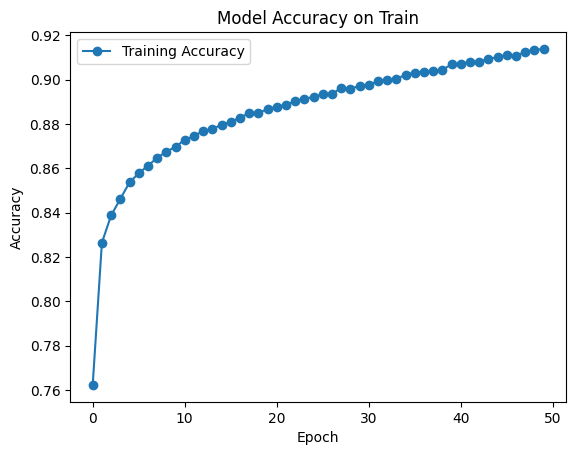

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Define your initial learning rate and number of epochs
initial_learning_rate = 0.01
nepochs = 50

# Define the time-based decay function
def lr_time_based_decay(epoch, lr):
    decay = initial_learning_rate / nepochs
    return initial_learning_rate * 1 / (1 + decay * epoch)

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the dataset
train_images, test_images = train_images / 255.0, test_images / 255.0

# Use the same network topology as before
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model with the time-based decay learning rate
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=initial_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set up a callback for learning rate scheduling
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lr_time_based_decay, verbose=1)

# Train the model with the learning rate scheduler callback
history = model.fit(train_images, train_labels, epochs=nepochs, batch_size=32, validation_data=(test_images, test_labels), callbacks=[lr_schedule])

# Summarize history for accuracy on the training set
plt.plot(history.history['accuracy'], '-o', label='Training Accuracy')
plt.title('Model Accuracy on Train')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()





## Exponential decay



Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7277 - accuracy: 0.7665 - val_loss: 0.5714 - val_accuracy: 0.8086 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009048374180359595.
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5131 - accuracy: 0.8272 - val_loss: 0.5130 - val_accuracy: 0.8239 - lr: 0.0090

Epoch 3: LearningRateScheduler setting learning rate to 0.008187307530779819.
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4714 - accuracy: 0.8387 - val_loss: 0.4873 - val_accuracy: 0.8332 - lr: 0.0082

Epoch 4: LearningRateScheduler setting learning rate to 0.007408182206817179.
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4489 - accuracy: 0.8456 - val_loss: 0.4732 - val_accuracy: 0.8359 - lr: 0.0074

Epoch 5: LearningRateScheduler setting learning rate to 0.0067032004603

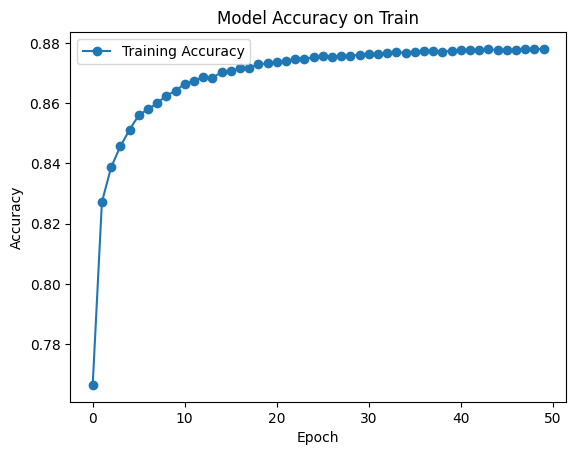

In [12]:
initial_learning_rate = 0.01
nepochs = 50

# Define the exponential decay function
def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * np.exp(-k * epoch)

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the dataset
train_images, test_images = train_images / 255.0, test_images / 255.0

# Use the same network topology as before
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model with the exponential decay learning rate
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=initial_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set up a callback for learning rate scheduling
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lr_exp_decay, verbose=1)

# Train the model with the learning rate scheduler callback
history = model.fit(train_images, train_labels, epochs=nepochs, batch_size=32, validation_data=(test_images, test_labels), callbacks=[lr_schedule])

# Summarize history for accuracy on the training set
plt.plot(history.history['accuracy'], '-o', label='Training Accuracy')
plt.title('Model Accuracy on Train')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


# Exercise: Regularizing Neural Networks

We discussed the bias-variance trade-off, which describes the problem of creating models which generalize well to unseen data. Neural networks are extremely susceptible to overfitting, as the vast number of parameters allows to perfectly represent the training data. Two common ways to address overfitting are either creating more data or using a regularization of the model. You already got to know regularization with regards to linear regression, which we will now extend to neural networks. We start with a norm regularization of the weights.

## L2 Regularization

This means adding the squared norm of all weights to the loss function

$J(\theta) \leftarrow J(\theta) + \frac{b}{2m} \sum_{l = 1}^{L} \vert \vert \mathbf{w^{[L]}}\vert \vert^2$,

where $b$ is the regularization parameter and $L$ the number of layers.


In [36]:
model_l2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(10, activation='softmax', kernel_regularizer=keras.regularizers.l2(0.001))
])

# Compile the model and optimize with Adam
model_l2.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [38]:
history_l2 = model_l2.fit(train_images, train_labels, epochs=50, batch_size=32, validation_data=(train_images, train_labels))


Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6642 - accuracy: 0.8201 - val_loss: 0.5257 - val_accuracy: 0.8579
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5391 - accuracy: 0.8468 - val_loss: 0.5132 - val_accuracy: 0.8564
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5163 - accuracy: 0.8525 - val_loss: 0.4882 - val_accuracy: 0.8643
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5065 - accuracy: 0.8575 - val_loss: 0.5338 - val_accuracy: 0.8390
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5002 - accuracy: 0.8580 - val_loss: 0.4830 - val_accuracy: 0.8652
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4923 - accuracy: 0.8606 - val_loss: 0.4781 - val_accuracy: 0.8664
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4872 - accuracy: 0.8636 - val_loss: 0.4718 - val_accuracy:




## Early stopping

Another possibility is to monitor the performance on the validation set and interrupt the training once it starts to drop. This procedure is called early stopping.


In [32]:
model_es = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model and optimize with Adam
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model_es.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Fit the model to the data while providing a validation set for each epoch
history_es = model_es.fit(x_train, train_labels, epochs=50, batch_size=32, validation_data=(x_test, test_labels), callbacks=[es])


Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5017 - accuracy: 0.8240 - val_loss: 0.4529 - val_accuracy: 0.8407
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3753 - accuracy: 0.8627 - val_loss: 0.4213 - val_accuracy: 0.8445
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3377 - accuracy: 0.8767 - val_loss: 0.3779 - val_accuracy: 0.8617
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3115 - accuracy: 0.8862 - val_loss: 0.3539 - val_accuracy: 0.8730
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2952 - accuracy: 0.8911 - val_loss: 0.3573 - val_accuracy: 0.8688
Epoch 5: early stopping


## Dropout

An additional very common technique to regularize the network is *dropout*. Using dropout means to randomly remove neurons with a probability $p$ during each training step.


In [34]:
model_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax'),
    keras.layers.Dropout(0.2)
])

# Compile the model and optimize with Adam
model_dropout.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [16]:
# Fit the model to the data while providing a validation set for each epoch
history_dropout = model_dropout.fit(x_train, train_labels, epochs=50, batch_size=32, validation_data=(x_test, test_labels))

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4566 - accuracy: 0.6489 - val_loss: 0.8698 - val_accuracy: 0.8247
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9665 - accuracy: 0.6885 - val_loss: 0.9304 - val_accuracy: 0.8317
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8388 - accuracy: 0.6988 - val_loss: 0.9463 - val_accuracy: 0.8429
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7854 - accuracy: 0.7013 - val_loss: 0.7647 - val_accuracy: 0.8566
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7120 - accuracy: 0.7066 - val_loss: 0.9045 - val_accuracy: 0.8567
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6728 - accuracy: 0.7095 - val_loss: 0.8983 - val_accuracy: 0.8614
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6468 - accuracy: 0.7127 - val_loss: 0.7974 - val_accuracy:

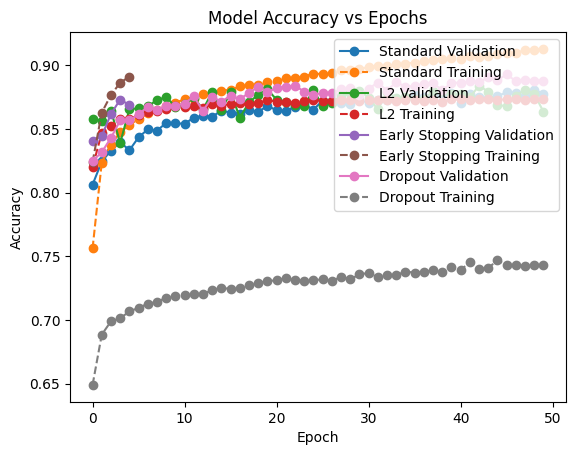

In [39]:
# Assuming hist_val_acc[0] contains validation accuracy for the 'Standard' model
plt.plot(hist_val_acc[0], '-o', label='Standard Validation')
plt.plot(hist_acc[0], '--o', label='Standard Training')

# Plotting validation accuracy for the L2 regularization model
plt.plot(history_l2.history['val_accuracy'], '-o', label="L2 Validation")
plt.plot(history_l2.history['accuracy'], '--o', label="L2 Training")

# Assuming history_es.history['val_accuracy'] contains validation accuracy for the Early Stopping model
plt.plot(history_es.history['val_accuracy'], '-o', label="Early Stopping Validation")
plt.plot(history_es.history['accuracy'], '--o', label="Early Stopping Training")

# Assuming history_dropout.history['val_accuracy'] contains validation accuracy for the Dropout model
plt.plot(history_dropout.history['val_accuracy'], '-o', label="Dropout Validation")
plt.plot(history_dropout.history['accuracy'], '--o', label="Dropout Training")

plt.title('Model Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()
